Top 3 Restaurants based on Ratings :

Doordash : 
- doordash/doordash_top_3_pizza.json
- doordash/doordash_top_3_sushi.json
- doordash/doordash_top_3_burger.json

UberEats :
- Uber Eats/top_3_pizza.json
- Uber Eats/top_3_sushi.json
- Uber Eats/top_3_burgers.json

GrubHub :
- grubhub/top_rated_pizza.json
- grubhub/top_rated_sushi.json
- grubhub/top_rated_burger.json

In [173]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
dish = input("Choose from 3 dishes - pizza, burger, sushi: ").strip().lower()

valid_dishes = ["pizza", "burger", "sushi"]
if dish not in valid_dishes:
    print("Invalid choice. Please choose from pizza, burger, or sushi.")
else:
    file_path1 = f"doordash/doordash_top_3_{dish}.json"
    file_path2 = f"Uber Eats/top_3_{dish}.json"
    file_path3 = f"grubhub/top_rated_{dish}.json"

    try:
        # Doordash
        with open(file_path1, "r", encoding="utf-8") as file:
            data1 = json.load(file)
        top_ratings1 = data1.get("top_ratings", [])
        df_doordash = pd.DataFrame(top_ratings1)

        # UberEats
        with open(file_path2, "r", encoding="utf-8") as file:
            data2 = json.load(file)
        top_ratings2 = data2.get("top_3_by_rating", [])
        df_ubereats = pd.DataFrame(top_ratings2)

        # GrubHub
        with open(file_path3, "r", encoding="utf-8") as file:
            data3 = json.load(file)
        top_ratings3 = data3.get("top_5_rated_restaurants", [])[0:3]
        df_grubhub = pd.DataFrame(top_ratings3)

        # Print confirmation
        print(f"Data loaded successfully for {dish} from all sources!")

    except FileNotFoundError as e:
        print(f"Error: {e}. Please ensure the correct files exist.")


Data loaded successfully for pizza from all sources!


In [ ]:
# file_path1 = "doordash/doordash_top_3_pizza.json"
# file_path2 = "Uber Eats/top_3_sushi.json"
# file_path3 = "grubhub/top_rated_pizza.json"

# # Doordash
# with open(file_path1, "r", encoding="utf-8") as file:
#     data1 = json.load(file)

# top_ratings1 = data1.get("top_ratings", [])
# df_doordash = pd.DataFrame(top_ratings1)

# UberEats
# with open(file_path2, "r", encoding="utf-8") as file:
#     data2 = json.load(file)
# top_ratings2 = data2.get("top_3_by_rating", [])
# df_ubereats = pd.DataFrame(top_ratings2)

# # GrubHub
# with open(file_path3, "r", encoding="utf-8") as file:
#     data3 = json.load(file)
# top_ratings3 = data3.get("top_5_rated_restaurants", [])[0:3]
# df_grubhub = pd.DataFrame(top_ratings3)



In [175]:
df_doordash['delivery_time'] = df_doordash['delivery_time'].str.replace(' min', '').astype(int)
df_doordash['distance'] = df_doordash['distance'].str.replace(' mi', '', regex=False)
df_doordash['platform'] = 'Doordash'

print(df_doordash)

  restaurant_id    restaurant_name        type ratings no_of_ratings distance  \
0        244402  Woodstock's Pizza  Restaurant     4.6           6k+      0.8   
1        240198        Blaze Pizza  Restaurant     4.6          10k+      0.8   
2      27727532    Square Pie Guys  Restaurant     4.6          100+      1.0   

   delivery_time                                                URL menu  \
0             32  https://www.doordash.com/store/244402?cursor=e...   []   
1             24  https://www.doordash.com/store/240198?cursor=e...   []   
2             28  https://www.doordash.com/store/27727532?cursor...   []   

   platform  
0  Doordash  
1  Doordash  
2  Doordash  


In [176]:
df_ubereats['distance'] = np.nan
df_ubereats['platform'] = 'UberEats'
print(df_ubereats)

                             name  \
0             Main St. Bagel Cafe   
1  Sacramento Natural Foods Co-Op   
2                      Posh Bagel   

                                                link  rating reviews location  \
0  https://www.ubereats.com/store/main-st-bagel-c...     4.9    (16)      N/A   
1  https://www.ubereats.com/store/sacramento-natu...     4.8  (310+)      N/A   
2  https://www.ubereats.com/store/posh-bagel-davi...     4.7  (300+)      N/A   

      delivery_fee  delivery_time  \
0  $0 delivery fee           9999   
1  $0 delivery fee             45   
2  $0 delivery fee           9999   

                                 categories and menu  distance  platform  
0  [Breakfast and Brunch, American, Sandwiches, $...       NaN  UberEats  
1  [Everyday Essentials, Snacks, Pizza, $, 2820 R...       NaN  UberEats  
2  [Breakfast and Brunch, Bagels, 206 F St, Davis...       NaN  UberEats  


In [177]:
def extract_avg_time(time_estimate):
    if isinstance(time_estimate, dict) and "min" in time_estimate and "max" in time_estimate:
        return int(round((time_estimate["min"] + time_estimate["max"]) / 2))
    return time_estimate

df_grubhub["delivery_time"] = df_grubhub["delivery_time_estimate"].apply(extract_avg_time)
df_grubhub['platform'] = 'GrubHub'

In [178]:
print(df_grubhub)

  restaurant_id                  name  pickup_available  delivery_available  \
0       5616456  Little Caesars Pizza             False                True   
1       8749232  Cenarios Pizza Davis             False                True   
2       3045695              Speedway             False                True   

   rating  coupons_available  accepts_credit  accepts_cash  \
0     5.0              False           False         False   
1     5.0              False           False         False   
2     5.0              False           False         False   

  distance_from_location  delivery_time_estimate  \
0                    1.9  {'min': 25, 'max': 40}   
1                   1.88  {'min': 25, 'max': 40}   
2                   18.5  {'min': 35, 'max': 50}   

                                            cuisines  delivery_time platform  
0  [Pizza, American, Fast Food, Italian, Lunch Sp...             32  GrubHub  
1                       [Pizza, American, Fast Food]             32

In [179]:
df_doordash = df_doordash.rename(columns={
    "restaurant_name": "restaurant_name",
    "ratings": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_ubereats = df_ubereats.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance": "distance(mi)"
})

df_grubhub = df_grubhub.rename(columns={
    "name": "restaurant_name",
    "rating": "ratings",
    "delivery_time": "delivery_time(min)",
    "distance_from_location": "distance(mi)"
})

df_doordash_renamed = df_doordash[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_ubereats_renamed = df_ubereats[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]
df_grubhub_renamed = df_grubhub[["restaurant_name", "ratings", "delivery_time(min)", "distance(mi)", "platform"]]

combined_results = pd.concat([df_doordash_renamed, df_ubereats_renamed, df_grubhub_renamed], ignore_index=True)

print(combined_results)


                  restaurant_name ratings  delivery_time(min) distance(mi)  \
0               Woodstock's Pizza     4.6                  32          0.8   
1                     Blaze Pizza     4.6                  24          0.8   
2                 Square Pie Guys     4.6                  28          1.0   
3             Main St. Bagel Cafe     4.9                9999          NaN   
4  Sacramento Natural Foods Co-Op     4.8                  45          NaN   
5                      Posh Bagel     4.7                9999          NaN   
6            Little Caesars Pizza     5.0                  32          1.9   
7            Cenarios Pizza Davis     5.0                  32         1.88   
8                        Speedway     5.0                  42         18.5   

   platform  
0  Doordash  
1  Doordash  
2  Doordash  
3  UberEats  
4  UberEats  
5  UberEats  
6   GrubHub  
7   GrubHub  
8   GrubHub  


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_92240/3705915277.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="platform", y="ratings", data=df, palette="Set2")


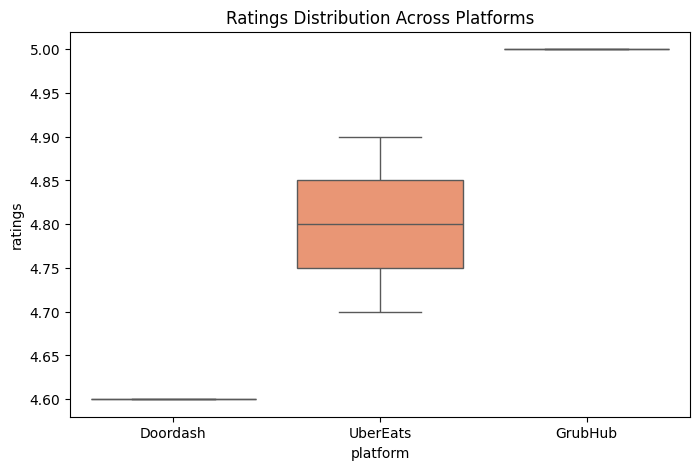

In [181]:
# Visualizations

df = combined_results
df["delivery_time(min)"] = pd.to_numeric(df["delivery_time(min)"], errors="coerce")
df.loc[df["delivery_time(min)"] > 200, "delivery_time(min)"] = None 

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")  # Convert to numeric, set invalid values as NaN
df.dropna(subset=["ratings"], inplace=True)  # Remove rows with missing ratings

plt.figure(figsize=(8, 5))
sns.boxplot(x="platform", y="ratings", data=df, palette="Set2")
plt.title("Ratings Distribution Across Platforms")
plt.show()


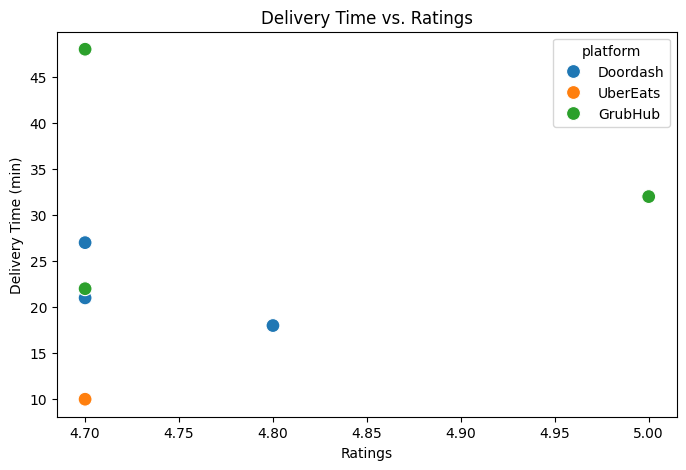

In [138]:
# Delivery Time vs. Ratings

plt.figure(figsize=(8, 5))
sns.scatterplot(x="ratings", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Delivery Time vs. Ratings")
plt.xlabel("Ratings")
plt.ylabel("Delivery Time (min)")
plt.show()

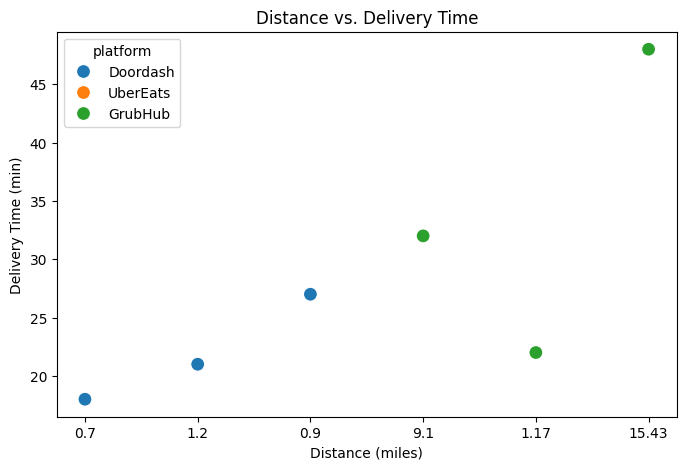

In [139]:
# Distance vs. Delivery Time

plt.figure(figsize=(8, 5))
sns.scatterplot(x="distance(mi)", y="delivery_time(min)", hue="platform", data=df, s=100)
plt.title("Distance vs. Delivery Time")
plt.xlabel("Distance (miles)")
plt.ylabel("Delivery Time (min)")
plt.show()


/var/folders/v2/p4pj9mdj47x4n7f33pfpttz00000gn/T/ipykernel_92240/2347672096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="coolwarm")


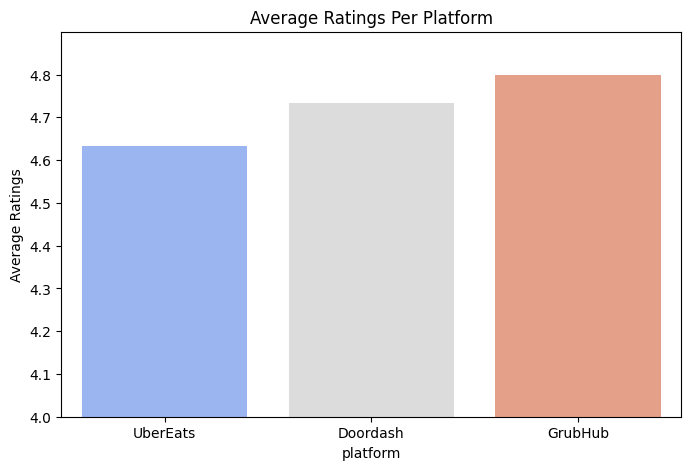

In [145]:
# Average Ratings Per Platform

plt.figure(figsize=(8, 5))

avg_ratings = df.groupby("platform")["ratings"].mean().sort_values()

sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="coolwarm")

plt.yticks(np.arange(4.0, avg_ratings.max() + 0.1, 0.1))

plt.title("Average Ratings Per Platform")
plt.ylabel("Average Ratings")
plt.ylim(4.0, avg_ratings.max() + 0.1)
plt.show()


In [182]:
combined_results['ratings'] = combined_results['ratings'].astype(float)

max_rating = combined_results['ratings'].max()

best_rated_restaurants = combined_results[combined_results['ratings'] == max_rating]

best_rated_restaurants_sorted = best_rated_restaurants.sort_values(by=['delivery_time(min)', 'distance(mi)'], 
                                                                    ascending=[True, True])

best_restaurant = best_rated_restaurants_sorted.iloc[0]

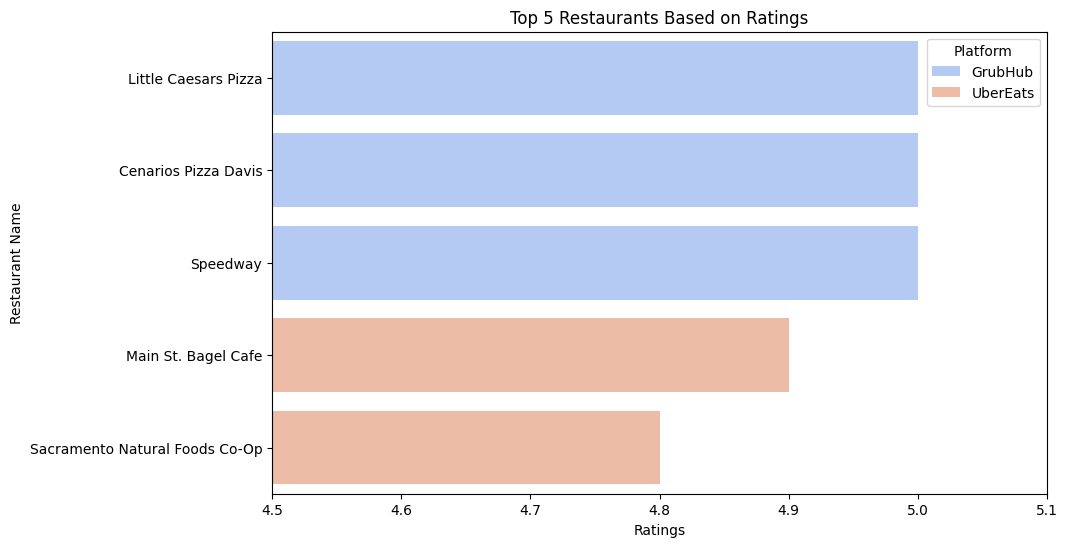

In [186]:
top_5 = combined_results.nlargest(5, "ratings")

plt.figure(figsize=(10, 6))

sns.barplot(x="ratings", y="restaurant_name", hue="platform", data=top_5, palette="coolwarm", dodge=False)

# for i, row in top_5.iterrows():
#     plt.text(row["ratings"] - 0.1, i, f"{row['delivery_time(min)']} min", va='center', ha='right', fontsize=10, color='black')

plt.xlabel("Ratings")
plt.ylabel("Restaurant Name")
plt.title("Top 5 Restaurants Based on Ratings")
plt.xlim(4.5, 5.1) 

plt.legend(title="Platform")
plt.show()


In [184]:
print("Best restaurant to order", dish, "in terms of Ratings is \"", best_restaurant['restaurant_name'], "\" \n")
print("Platform to order from :", best_restaurant['platform'])
print("Ratings :", best_restaurant['ratings'])
print("Delivery Time :", best_restaurant['delivery_time(min)'])
print("Distance in Miles :", best_restaurant['distance(mi)'])

Best restaurant to order pizza in terms of Ratings is " Cenarios Pizza Davis " 

Platform to order from : GrubHub
Ratings : 5.0
Delivery Time : 32.0
Distance in Miles : 1.88
